# **Waze Project**

## **`Plan Phase`**

In [1]:
#Importing Librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit


#### **Data overview and summary statistics**

In [2]:
#Importing dataset
df = pd.read_csv(r"C:\Users\USER\Documents\Data Science Repositories\Waze Project Lab\waze_dataset.csv") #replace with simply waze.csv

#Descriptive statistic
df.head()
df.size
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


ID      sessions        drives  total_sessions  \
count  14999.000000  14999.000000  14999.000000    14999.000000   
mean    7499.000000     80.633776     67.281152      189.964447   
std     4329.982679     80.699065     65.913872      136.405128   
min        0.000000      0.000000      0.000000        0.220211   
25%     3749.500000     23.000000     20.000000       90.661156   
50%     7499.000000     56.000000     48.000000      159.568115   
75%    11248.500000    112.000000     93.000000      254.192341   
max    14998.000000    743.000000    596.000000     1216.154633   

       n_days_after_onboarding  total_navigations_fav1  \
count             14999.000000            14999.000000   
mean               1749.837789              121.605974   
std                1008.513876              148.121544   
min                   4.000000                0.000000   
25%                 878.000000                9.000000   
50%                1741.000000               71.000000   
75%                2623.500000              178.000000   
max                3500.000000             1236.000000   

       total_navigations_fav2  driven_km_drives  duration_minutes_drives  \
count            14999.000000      14999.000000             14999.000000   
mean                29.672512       4039.340921              1860.976012   
std                 45.394651       2502.149334              1446.702288   
min                  0.000000         60.441250                18.282082   
25%                  0.000000       2212.600607               835.996260   
50%                  9.000000       3493.858085              1478.249859   
75%                 43.000000       5289.861262              2464.362632   
max                415.000000      21183.401890             15851.727160   

       activity_days  driving_days  
count   14999.000000  14999.000000  
mean       15.537102     12.179879  
std         9.004655      7.824036  
min         0.000000      0.000000  
25%         8.000000      5.000000  
50%        16.000000     12.000000  
75%        23.000000     19.000000  
max        31.000000     30.000000

### **Data Cleaning**

In [3]:
df.isnull().value_counts()
df.isnull().sum()
df.dropna(inplace=True)
df.head(10)
df.isnull().sum()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 14299 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14299 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14299 non-null  int64  
 3   drives                   14299 non-null  int64  
 4   total_sessions           14299 non-null  float64
 5   n_days_after_onboarding  14299 non-null  int64  
 6   total_navigations_fav1   14299 non-null  int64  
 7   total_navigations_fav2   14299 non-null  int64  
 8   driven_km_drives         14299 non-null  float64
 9   duration_minutes_drives  14299 non-null  float64
 10  activity_days            14299 non-null  int64  
 11  driving_days             14299 non-null  int64  
 12  device                   14299 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


ID      sessions        drives  total_sessions  \
count  14299.000000  14299.000000  14299.000000    14299.000000   
mean    7503.573117     80.623820     67.255822      189.547409   
std     4331.207621     80.736502     65.947295      136.189764   
min        0.000000      0.000000      0.000000        0.220211   
25%     3749.500000     23.000000     20.000000       90.457733   
50%     7504.000000     56.000000     48.000000      158.718571   
75%    11257.500000    111.000000     93.000000      253.540450   
max    14998.000000    743.000000    596.000000     1216.154633   

       n_days_after_onboarding  total_navigations_fav1  \
count             14299.000000            14299.000000   
mean               1751.822505              121.747395   
std                1008.663834              147.713428   
min                   4.000000                0.000000   
25%                 878.500000               10.000000   
50%                1749.000000               71.000000   
75%                2627.500000              178.000000   
max                3500.000000             1236.000000   

       total_navigations_fav2  driven_km_drives  duration_minutes_drives  \
count            14299.000000      14299.000000             14299.000000   
mean                29.638296       4044.401535              1864.199794   
std                 45.350890       2504.977970              1448.005047   
min                  0.000000         60.441250                18.282082   
25%                  0.000000       2217.319909               840.181344   
50%                  9.000000       3496.545617              1479.394387   
75%                 43.000000       5299.972162              2466.928876   
max                415.000000      21183.401890             15851.727160   

       activity_days  driving_days  
count   14299.000000  14299.000000  
mean       15.544653     12.182530  
std         9.016088      7.833835  
min         0.000000      0.000000  
25%         8.000000      5.000000  
50%        16.000000     12.000000  
75%        23.000000     19.000000  
max        31.000000     30.000000

## **`Analysis Phase`**

### **Univariate Analysis & Vizualizations**

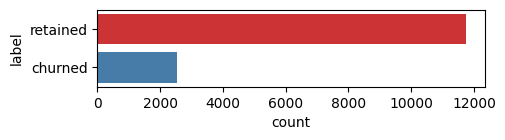

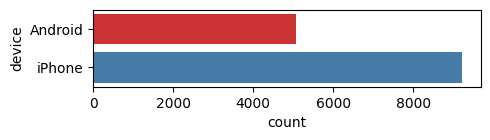

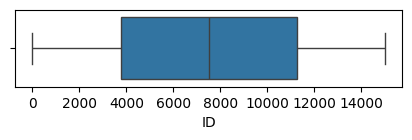

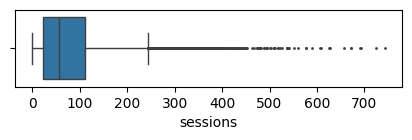

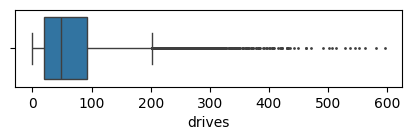

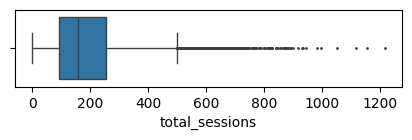

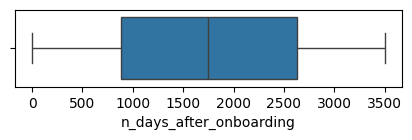

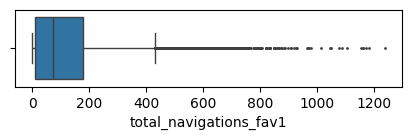

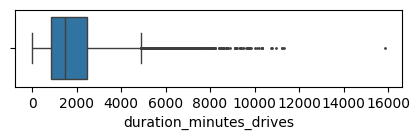

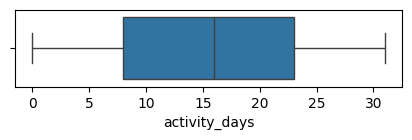

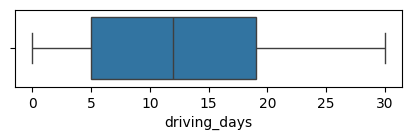

In [4]:
for feature in df.dtypes[df.dtypes == object].index:
    plt.figure(figsize=(5,1))
    sns.countplot(data=df, y=feature, hue=feature, palette='Set1', legend=False)
    plt.show()

for feature in df.dtypes[df.dtypes != object].index:
    plt.figure(figsize=(5,1))
    sns.boxplot(data=df, x=feature, fliersize=1)
    plt.show()


##### **User Rentention**

In [5]:
df['label'].value_counts(normalize=True) * 100

label
retained    82.264494
churned     17.735506
Name: proportion, dtype: float64

The proportion of users that were `churned` for the whole data was `17.74%` compared to the `82.27%` were retained.

#### ***User Device***

In [6]:
df['device'].value_counts(normalize=True) * 100

device
iPhone     64.515001
Android    35.484999
Name: proportion, dtype: float64


`64.5%` used `iPhone` to navigate the Waze App,
`35.5%` were `Android` users.

#### **Distribution of Various Variables**

In [7]:
# Histogram of user sessions in the last month
fig, ax = plt.subplots(1, 2, figsize = (22,10))
sns.histplot(x=df['sessions'], ax=ax[0])
median_sess=df['sessions'].median()
ax[0].axvline(median_sess,color='red', linestyle = '--')
ax[0].text(75,1200, 'median=56.0', color='red')
ax[0].set_title('session histogram')

# Histogram of user drives in the last month
sns.histplot(x=df['drives'], ax=ax[1])
median_drv=df['drives'].median()
ax[1].axvline(median_drv,color='red', linestyle = '--')
ax[1].text(75,1000, 'median=48.0', color='red')
ax[1].set_title('drives histogram')
plt.show()

#### Sessions
The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### Drive
The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

In [8]:
# Creating a  function for multiple histogram 
def histogram(column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plot the histogram
    plt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram')

Median: 1749.0
Median: 16.0
Median: 12.0


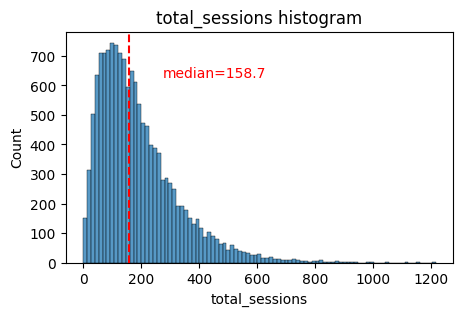

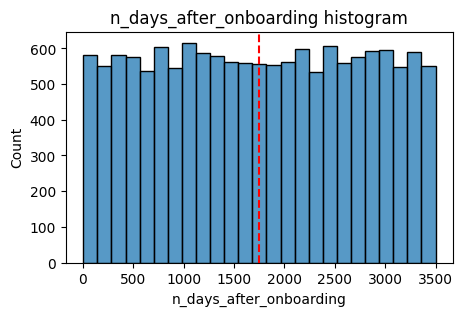

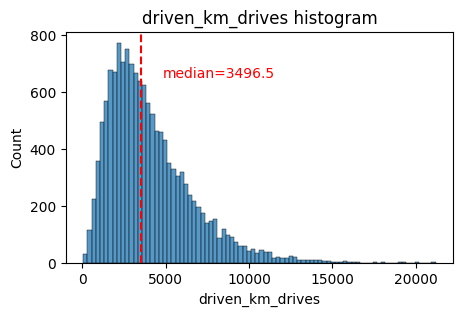

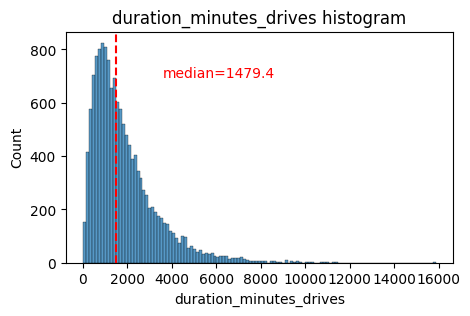

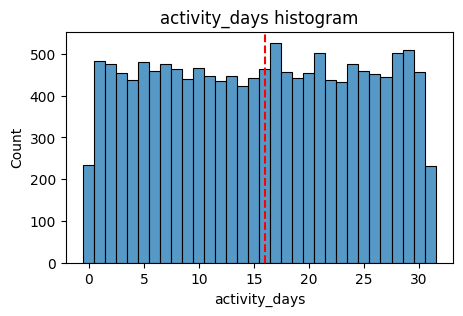

In [9]:
#Plotting multiple Histogram to show their distribution
histogram('total_sessions')
histogram('n_days_after_onboarding', median_text=False)
histogram('driven_km_drives')
histogram('duration_minutes_drives')
histogram('activity_days', median_text=False, discrete=True)
histogram('driving_days', median_text=False, discrete=True)


##### `🔍 Key Observations:`

#### Number of Days Since Onboarding Histogram
The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).


#### Total_Sessions Histogram
The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 56 and the median total sessions was ~160, then it seems that a large proportion of a user's (estimated) total drives might have taken place in the last month. This is something you can examine more closely later.


#### Activity_Days Histogram

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which you might think would be closely correlated with `activity_days`.

#### Driving_day Histogram 
The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.


#### Driving Days vs. Activity Days

In [10]:
plt.figure(figsize=(15,4))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('Days')
plt.ylabel('Count')
plt.legend()
plt.title('Driving days vs. Activity days');


##### `🔍 Key Observations:`
A large concentration of users fall between 01 and 25 days of both driving and activity.

Activity days slightly outnumber driving days at almost every level, indicating that users are often engaging with the app even when they are not driving.

At first glance, it might seem counterintuitive that more users have zero driving days compared to those with zero activity days. One might expect both metrics to align more closely. However, upon deeper reflection, this observation actually highlights an important distinction:

Activity days represent any user interaction with the app (e.g., opening the app, checking traffic, exploring routes).

Driving days are strictly when users engaged in driving behavior.

🤔 Why the Difference?
It's likely that users open the app more frequently than they drive. They might:

Check drive times or routes without initiating a drive.

Update settings or preferences.

Open the app accidentally or out of curiosity.

This subtle but important behavioral pattern explains why activity days often exceed driving days for many users.


🤔Very few users reach the maximum of 31 days of activity or driving, suggesting limited full-month engagement. 

This is a cause for concern, why are there no driving activities on the 31st of the month?
With over 15,000 users it is highly unlikely that no user drove on the 31st.
Was different months used for the two variables here?

Confirming the maximum number of days for both activity days and driving days to be certian.

In [11]:
print('Number of days for Driving days :', df['driving_days'].max())
print('Number of days for Activity days :', df['activity_days'].max())


Number of days for Driving days : 30
Number of days for Activity days : 31


As seen, this confirms that the two variables were likely measured over slightly different time spans (or definitions), adding another layer to the interpretation. It may be worthwhile to reach out to the Waze data team to clarify how each variable was tracked and defined, especially since these metrics are crucial to understanding user engagement.

#### Driving days vs Activity Days

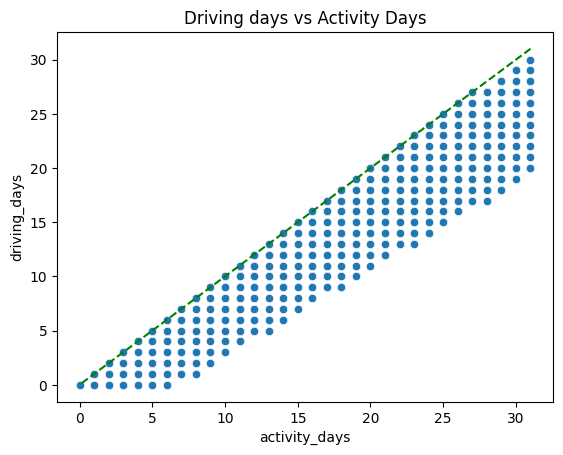

In [12]:
sns.scatterplot(data=df, x= 'activity_days', y='driving_days')
plt.title('Driving days vs Activity Days')
plt.plot([31,0], [31,0], color='green', linestyle='--')
plt.show()

#### ✅ Validity Check:
Every point lies on or below the diagonal, which confirms a logical consistency:

💡 You can't drive without being active in the app that day.

No users have more driving days than activity days, which validates the dataset's internal consistency with respect to these two variables.

This plot not only affirms data quality but also visually reinforces the behavioral relationship between app activity and actual driving

#### **User Rentention by Device Histogram**

In [13]:
plt.figure(figsize=(6,5))
sns.histplot(data=df, x='device', hue='label', multiple='dodge', shrink=0.5,)
plt.title('User Retention by Device Histogram', fontsize='14')
plt.show()

The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**


In [14]:
df['km_per_driving_day'] = df['driven_km_drives']/df['driving_days']
df['km_per_driving_day'].describe()

c:\Users\USER\Documents\Data Science Repositories\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.429900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.675616e+02
50%      3.241789e+02
75%      7.608293e+02
max               inf
Name: km_per_driving_day, dtype: float64

We had infinty values because `driving days` has zero values. Correcting the infinite values to absolute zero.

In [15]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14299.000000
mean       581.942399
std       1038.254509
min          0.000000
25%        136.168003
50%        273.301012
75%        558.018761
max      15420.234110
Name: km_per_driving_day, dtype: float64

In [16]:
df.groupby('label')['km_per_driving_day'].mean()

label
churned     914.174855
retained    510.315985
Name: km_per_driving_day, dtype: float64

#### **Churn Rate by Driving Distanceper day (km)**

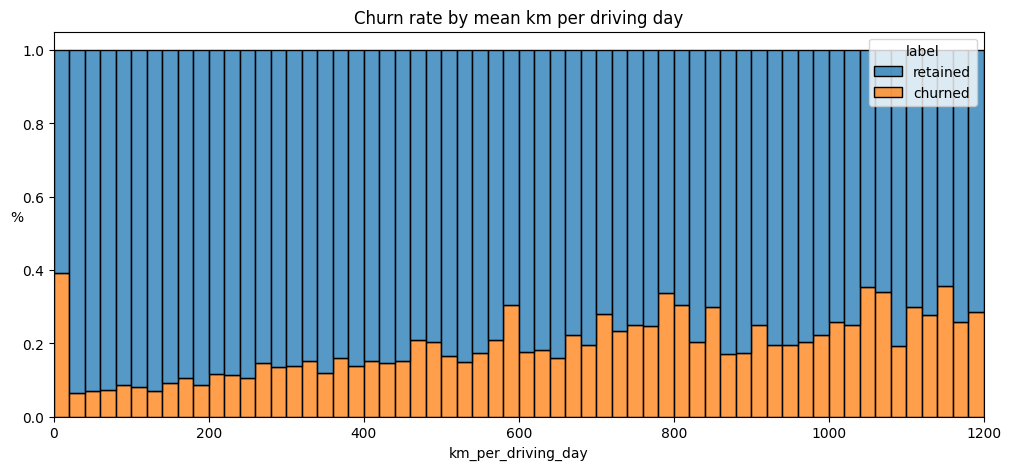

In [17]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day');

#### `🔍 Key Observations:`
Aside Users who had 0 driving_km having ~40% churn rate.

Users with very high average kilometers per driving day were more likely to churn.

As average daily driving distance increases, the proportion of churned users to retained also increases, suggesting that there was heavier drivers are more likely to stop using the app.

`❓ Why would users with long drives churn more?`
Possibilities:

One-time users who used Waze on a long trip, then never returned

Tourists or occasional users — not regular commuters

These users might drive a lot infrequently (e.g., truckers, delivery once per week)


This feature could be highly predictive in identifying users likely to churn based on intensity of app usage.

#### **Churn rate per number of driving days**


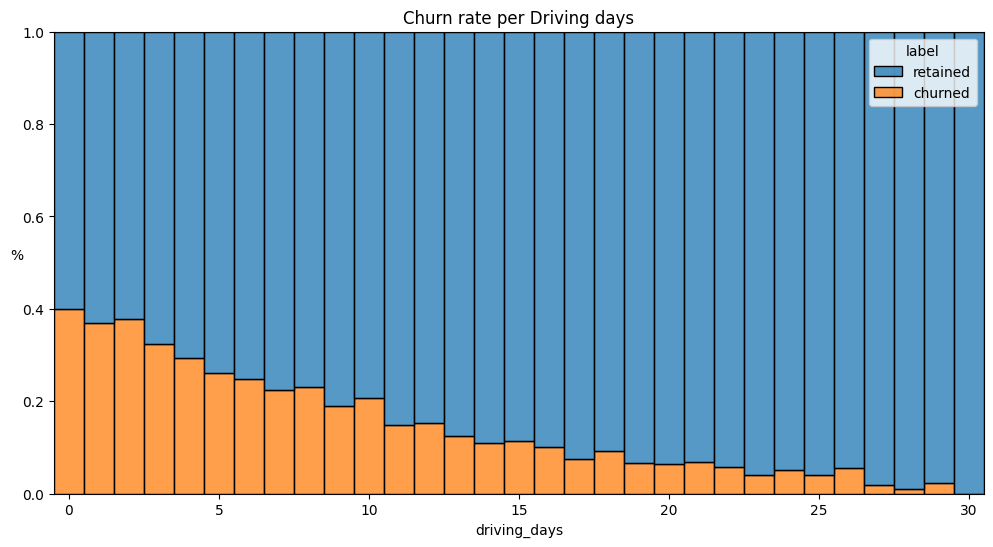

In [18]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x= 'driving_days', hue='label', multiple='fill', discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per Driving days')
plt.show();

#### `🔍 Key Observations:`

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

In [19]:
df.head()

ID     label  sessions  drives  total_sessions  n_days_after_onboarding  \
0   0  retained       283     226      296.748273                     2276   
1   1  retained       133     107      326.896596                     1225   
2   2  retained       114      95      135.522926                     2651   
3   3  retained        49      40       67.589221                       15   
4   4  retained        84      68      168.247020                     1562   

   total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
0                     208                       0       2628.845068   
1                      19                      64      13715.920550   
2                       0                       0       3059.148818   
3                     322                       7        913.591123   
4                     166                       5       3950.202008   

   duration_minutes_drives  activity_days  driving_days   device  \
0              1985.775061             28            19  Android   
1              3160.472914             13            11   iPhone   
2              1610.735904             14             8  Android   
3               587.196542              7             3   iPhone   
4              1219.555924             27            18  Android   

   km_per_driving_day  
0          138.360267  
1         1246.901868  
2          382.393602  
3          304.530374  
4          219.455667

### Engagement Intensity Over Time

In [20]:
df['session_rate'] = df['sessions'] / df['n_days_after_onboarding']

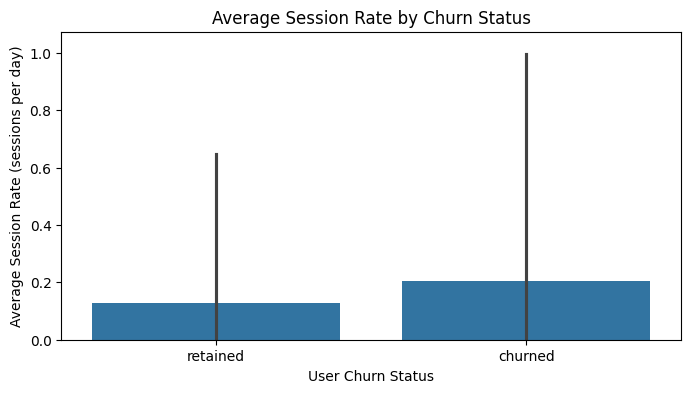

In [21]:
# Bar plot of average session_rate
plt.figure(figsize=(8, 4))
sns.barplot(x='label', y='session_rate', data=df, errorbar='sd')  # ci='sd' adds standard deviation bars
plt.title('Average Session Rate by Churn Status')
plt.ylabel('Average Session Rate (sessions per day)')
plt.xlabel('User Churn Status')
plt.ylim(bottom=0)
plt.show()

#### **`Key Observations:`**
That means:

Churned users had a higher session rate (0.2 sessions/day)

Retained users had a lower session rate (0.1 sessions/day)

❓ Wait — Isn't that backward?
Yes — this contradicts expectations, because we'd expect high session rate → more engaged → less churn.

Possible reasons:

🔍 Possible Explanation
Short-term heavy usage before churn
Could be skewed by short-time power users
Some users may have intensely used Waze in the first few days (e.g., for a trip), then never came back.

Because their `n_days_after_onboarding` is small, even a few sessions make session_rate look high.

Long-tenured users have very small session rates
Since median `n_days_after_onboarding` = 1,750 days (almost 5 years!)
Even if they had hundreds of sessions, dividing by 1,750 days will produce a very small `session_rate`

The `session_rate metric` is biased:

It penalizes long-tenured users (retained)

It inflates engagement for short-term users (churned)

#### **Recent Session Rate by Churn Status**
Confirming if recency bias plays a role in the penalization of long-turned users and inflates the churn rate overall.

In [22]:
df['recent_session_rate'] = df['sessions'] / df['activity_days']
plt.figure(figsize=(8, 4))
sns.barplot(x='label', y='recent_session_rate', data=df)  # ci='sd' adds standard deviation bars
plt.title('Recent Session Rate by Churn Status')
plt.ylabel('Recent Session Rate (sessions per day)')
plt.xlabel('User Churn Status')
plt.show()

#### `Key Observation`

From recent session rate in the last 31 day(activity days), we can confirm new or current users are those who were likely to churn.

C:\Users\USER\AppData\Local\Temp\ipykernel_5324\1307226787.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = df.groupby('tenure_group')['churn_flag'].mean().reset_index()


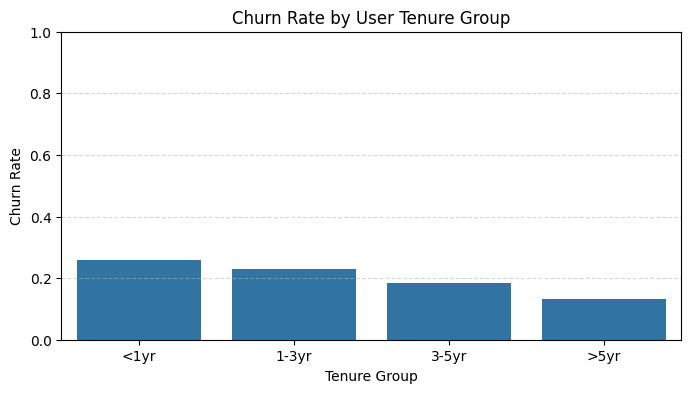

In [23]:
df['tenure_group'] = pd.cut(df['n_days_after_onboarding'], bins=[0, 365, 1095, 1825, 3500],
                            labels=['<1yr', '1-3yr', '3-5yr', '>5yr'])

# If label is still a string (e.g., 'churned', 'retained'), convert to binary for aggregation
df['churn_flag'] = df['label'].apply(lambda x: 1 if x == 'churned' else 0)

# Group and compute churn rate
churn_by_tenure = df.groupby('tenure_group')['churn_flag'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x='tenure_group', y='churn_flag', data=churn_by_tenure)
plt.title('Churn Rate by User Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#### **Churn Rate by User Tenure Group**

C:\Users\USER\AppData\Local\Temp\ipykernel_5324\3846758639.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


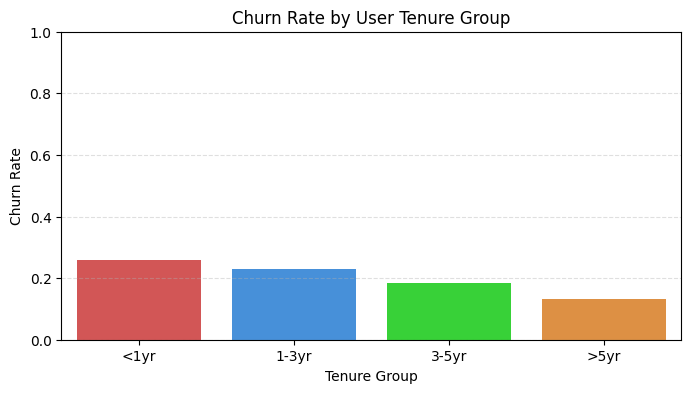

In [ ]:
labels = ['<1yr', '1-3yr', '3-5yr', '>5yr']
palette = {
    '<1yr': "#e74141",     # light red
    '1-3yr': "#2f90f1",    # light blue
    '3-5yr': "#1fea1f",    # light green
    '>5yr': "#f7902a"      # light orange
}
# Plot
plt.figure(figsize=(8, 4))
sns.barplot(
    x='tenure_group', 
    y='churn_flag', 
    data=churn_by_tenure, 
    palette=palette
)

plt.title('Churn Rate by User Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


Segmenting by tenure to avoid this division bias, we notice that users under 1 year turn to have a higher churn rate compared to those who have used the app longer showing a level of loyalty by longterm users.

In [25]:
'''# Defining threshold for low engagement
low_threshold = 0.05
df["low_engagement"] = df["session_rate"] < low_threshold

# Counting churned users in low engagement group
low_engagement_churn = df[df["low_engagement"]]["label"].value_counts(normalize=True)

print("Churn rate among low-engagement users:")
print(low_engagement_churn)'''

'# Defining threshold for low engagement\nlow_threshold = 0.05\ndf["low_engagement"] = df["session_rate"] < low_threshold\n\n# Counting churned users in low engagement group\nlow_engagement_churn = df[df["low_engagement"]]["label"].value_counts(normalize=True)\n\nprint("Churn rate among low-engagement users:")\nprint(low_engagement_churn)'

Insights You Should Derive:
What % of low-engagement users are churned?

Is there a clear separation between session_rate of churned vs retained?

Can session_rate serve as a simple rule to flag users for churn-prevention campaigns?

In [26]:
'''# Comparing churn rates for low vs. high engagement
sns.barplot(x='low_engagement', y='session_rate', hue='label', data=df)
plt.title('Churn vs. Engagement Level')
plt.xlabel('Low Engagement (session_rate < 0.05)')
plt.ylabel('Session Rate')
plt.show()'''

"# Comparing churn rates for low vs. high engagement\nsns.barplot(x='low_engagement', y='session_rate', hue='label', data=df)\nplt.title('Churn vs. Engagement Level')\nplt.xlabel('Low Engagement (session_rate < 0.05)')\nplt.ylabel('Session Rate')\nplt.show()"

### **Exploartory Conclusion**

A summary of key takeaways to share with Harriet Hadzic, Waze’s Director of Data Analysis.

#### 1. What types of distributions did you notice in the variables? What did this tell you about the data?

> Most of the variables were either heavily right-skewed or uniformly distributed. The right-skewed ones show that most users had low values for those metrics, while the uniform ones suggest user values were spread fairly evenly across the range.

#### 2. Was there anything that led you to believe the data was erroneous or problematic in any way?

> The data generally looked good, with no single variable standing out as completely incorrect. However, some outliers—like very high values in `driven_km_drives`—seemed suspicious. Also, `activity_days` had a max of 31, while `driving_days` only reached 30, which could mean those variables were tracked in different months.

#### 3. Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?

> Yes, I'd want to confirm whether all the monthly metrics were recorded in the same month. The discrepancy in maximum day values raises doubts. I’d also ask if anything changed recently in the app—some long-time users showed a big increase in activity just last month, and that spike might be tied to a new feature or campaign.

#### 4. What percentage of users churned and what percentage were retained?

> Around 18% of users churned, while approximately 82% were retained.

#### 5. What factors correlated with user churn? How?

> Users who drove more kilometers per driving day were more likely to churn. On the flip side, users with more driving days in the month were less likely to churn—suggesting frequent engagement lowers churn risk.

#### 6. Did newer users have greater representation in this dataset than users with longer tenure? How do you know?

> No. The dataset showed a fairly even mix of user tenures, from new users to those who’ve used the app for nearly 10 years. This was evident in the histogram of `n_days_after_onboarding`, which had a uniform distribution.


## **`Construct Phase`**

### **Statistical Analyses**

#### Hypothesis Testing

In [27]:
from scipy import stats


#### **📌 Hypothesis 1 : Devices User vs Drives**
First, Do iPhone and Android users differ in total drives?

Hypothesis Statement


> $H_0$: There is no difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

> $H_A$: There is a difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

📊 Test type: Two-sample t-test.

In [28]:
# 2. Creating new `device_type` column
df['device_type'] = df['device']

# 3. Map the new column to the dictionary
df['device_type'] = df['device_type'].map({'Android': 0, 'iPhone':1})

df['device_type'].head()

0    0
1    1
2    0
3    1
4    0
Name: device_type, dtype: int64

In [29]:
df.groupby('device_type')['drives'].mean()

device_type
0    66.024241
1    67.933225
Name: drives, dtype: float64

Based on the averages shown, it appears that drivers who use an iPhone device to interact with the application have a higher number of drives on average. However, this difference might arise from random sampling, rather than being a true difference in the number of drives. To assess whether the difference is statistically significant, I will conduct a hypothesis test for this.

In [30]:
# 1. Isolating the `drives` column for iPhone users.
Android = df[df['device_type']==0]['drives']

# 2. Isolating the `drives` column for Android users.
iPhone = df[df['device_type']==1]['drives']

#Performing a t-test
stats.ttest_ind(a=iPhone, b=Android, equal_var=False)

TtestResult(statistic=np.float64(1.676594122141587), pvalue=np.float64(0.09365074661708836), df=np.float64(10826.925404660755))

p-value = 0.0936 = 9.4%
t-stats = 1.68


pvalue (9.4%) > signifiacant level (5%)

Since the pvalue is higher thant he significant level we fail to reject the null hypothesis

$H_0$: There is no difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

#### **📌 Hypothesis 2: Engagement vs. Churn**

Purpose: Understand how driving activity correlates with user churn.

>$H_0$: There is no difference in average number of driving days between churned and retained users.    

>$H_A$: Retained users have a higher average number of driving days than churned users.

✅ Why this matters: If retained users show significantly more frequent driving activity, Waze can build engagement-based retention strategies (e.g., notifications, gamification).

📊 Test type: Two-sample t-test.

In [31]:
df['label_type'] = df['label'].map({'churned':0, 'retained': 1})
df['label_type'].head()

0    1
1    1
2    1
3    1
4    1
Name: label_type, dtype: int64

In [32]:
df.groupby('label_type')['driving_days'].mean()

label_type
0     7.218060
1    13.252827
Name: driving_days, dtype: float64

Churned -  7.22 average days per month (30)

Retained - 13.3 average days per month(30)

In [33]:
# 1. Isolating the `driving_days` column for Churned users.
Churn = df[df['label_type']==0]['driving_days']

# 2. Isolating the `driving_days` column for Retained users.
Retain = df[df['label_type']==1]['driving_days']

#Performing a t-test
stats.ttest_ind(a=Churn, b=Retain, equal_var=False)

TtestResult(statistic=np.float64(-40.78781379102029), pvalue=np.float64(1.6662283019615585e-306), df=np.float64(4182.856860250851))

p-value = 1.67e-306
t-stats = -40.78


p-value essentially 0, way below 0.05 < signifiacant level (5%)

Since the pvalue is lower than the significant level we reject the null hypothesis

>$H_A$: Retained users have a higher average number of driving days than churned users.

#### **📌 Hypothesis 3: Navigation Behavior & Device Usage**
Purpose: Explore whether device type impacts use of navigation features (favorite routes).

> $H_0$: There is no difference in the total navigations via favorite route 1 between iPhone and Android users.

> $H_A$: iPhone and Android users differ in how often they use favorite route 1.

✅ Why this matters: Differences may reflect UX issues or feature adoption differences across platforms. It can guide product enhancements per device.

📊 Test type: Two-sample t-test.

In [34]:
df.groupby('device_type')['total_navigations_fav1'].mean()

device_type
0    121.882538
1    121.673062
Name: total_navigations_fav1, dtype: float64

In [35]:
# 1. Isolating the `total_navigations_fav1` column for iPhone users.
Android_nav = df[df['device_type']==0]['total_navigations_fav1']

# 2. Isolating the `total_navigations_fav1` column for Android users.
iPhone_nav = df[df['device_type']==1]['total_navigations_fav1']

#Performing a t-test
stats.ttest_ind(a=iPhone_nav, b=Android_nav, equal_var=False)

TtestResult(statistic=np.float64(-0.08125410198934967), pvalue=np.float64(0.9352414239743816), df=np.float64(10494.76833926635))

p-value = 0.935 = 93.5%
t-stats = -0.0812


p-value (93.5%) > signifiacant level (5%)

Since the p-value is higher thant he significant level we fail to reject the null hypothesis

> $H_0$: There is no difference in the total navigations via favorite route 1 between iPhone and Android users.



### **Regression Analysis**

Our main focus for this analysis is to build a model to predict if Users will churn or retain the Waze Navigation App.
To do this must select the suitable features to build the model around.

In [36]:
#importing libraries for regression modelling

import statsmodels.api as sm
from statsmodels.formula.api import logit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression


In [37]:
df.columns

Index(['ID', 'label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device', 'km_per_driving_day',
       'session_rate', 'recent_session_rate', 'tenure_group', 'churn_flag',
       'device_type', 'label_type'],
      dtype='object')

In [38]:
df['label'].isnull().sum()


np.int64(0)

In [39]:
df['label'].value_counts(normalize=True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

In [40]:
df.describe()

c:\Users\USER\Documents\Data Science Repositories\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


ID      sessions        drives  total_sessions  \
count  14299.000000  14299.000000  14299.000000    14299.000000   
mean    7503.573117     80.623820     67.255822      189.547409   
std     4331.207621     80.736502     65.947295      136.189764   
min        0.000000      0.000000      0.000000        0.220211   
25%     3749.500000     23.000000     20.000000       90.457733   
50%     7504.000000     56.000000     48.000000      158.718571   
75%    11257.500000    111.000000     93.000000      253.540450   
max    14998.000000    743.000000    596.000000     1216.154633   

       n_days_after_onboarding  total_navigations_fav1  \
count             14299.000000            14299.000000   
mean               1751.822505              121.747395   
std                1008.663834              147.713428   
min                   4.000000                0.000000   
25%                 878.500000               10.000000   
50%                1749.000000               71.000000   
75%                2627.500000              178.000000   
max                3500.000000             1236.000000   

       total_navigations_fav2  driven_km_drives  duration_minutes_drives  \
count            14299.000000      14299.000000             14299.000000   
mean                29.638296       4044.401535              1864.199794   
std                 45.350890       2504.977970              1448.005047   
min                  0.000000         60.441250                18.282082   
25%                  0.000000       2217.319909               840.181344   
50%                  9.000000       3496.545617              1479.394387   
75%                 43.000000       5299.972162              2466.928876   
max                415.000000      21183.401890             15851.727160   

       activity_days  driving_days  km_per_driving_day  session_rate  \
count   14299.000000  14299.000000        14299.000000  14299.000000   
mean       15.544653     12.182530          581.942399      0.140824   
std         9.016088      7.833835         1038.254509      0.579104   
min         0.000000      0.000000            0.000000      0.000000   
25%         8.000000      5.000000          136.168003      0.013864   
50%        16.000000     12.000000          273.301012      0.036872   
75%        23.000000     19.000000          558.018761      0.089827   
max        31.000000     30.000000        15420.234110     20.615385   

       recent_session_rate    churn_flag   device_type    label_type  
count         1.429700e+04  14299.000000  14299.000000  14299.000000  
mean                   inf      0.177355      0.645150      0.822645  
std                    NaN      0.381982      0.478485      0.381982  
min           0.000000e+00      0.000000      0.000000      0.000000  
25%           1.625000e+00      0.000000      0.000000      1.000000  
50%           4.176471e+00      0.000000      1.000000      1.000000  
75%           1.005556e+01      0.000000      1.000000      1.000000  
max                    inf      1.000000      1.000000      1.000000

From the descriptive statistics we can tell that some of the variables have outliers comparing their max values to the 75th percentile the difference is huge. We have to deal with outliers before we can build the model.

#### **Handling outliers**

The box plots from the previous section and the descriptive stats indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

It may be more useful to impute outlying data with more reasonable values. Performing imputation is to set a threshold based on a percentile of the distribution.

In [41]:
def outlier_imputer(column_name, percentile):
    # Calculating threshold
    threshold = df[column_name].quantile(percentile)
    # Imputimg threshold for values > than threshold
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

In [42]:
for column in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1',
               'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives','km_per_driving_day']:
               outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 200.0
           total_sessions | percentile: 0.95 | threshold: 455.4394923899998
   total_navigations_fav1 | percentile: 0.95 | threshold: 422.0
   total_navigations_fav2 | percentile: 0.95 | threshold: 124.0
         driven_km_drives | percentile: 0.95 | threshold: 8898.716274999999
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.180091799999
       km_per_driving_day | percentile: 0.95 | threshold: 2258.494484349992


In [43]:
df.describe()

c:\Users\USER\Documents\Data Science Repositories\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


ID      sessions        drives  total_sessions  \
count  14299.000000  14299.000000  14299.000000    14299.000000   
mean    7503.573117     76.539688     63.964683      183.717304   
std     4331.207621     67.243178     55.127927      118.720520   
min        0.000000      0.000000      0.000000        0.220211   
25%     3749.500000     23.000000     20.000000       90.457733   
50%     7504.000000     56.000000     48.000000      158.718571   
75%    11257.500000    111.000000     93.000000      253.540450   
max    14998.000000    243.000000    200.000000      455.439492   

       n_days_after_onboarding  total_navigations_fav1  \
count             14299.000000            14299.000000   
mean               1751.822505              114.562767   
std                1008.663834              124.378550   
min                   4.000000                0.000000   
25%                 878.500000               10.000000   
50%                1749.000000               71.000000   
75%                2627.500000              178.000000   
max                3500.000000              422.000000   

       total_navigations_fav2  driven_km_drives  duration_minutes_drives  \
count            14299.000000      14299.000000             14299.000000   
mean                27.187216       3944.558631              1792.911210   
std                 36.715302       2218.358258              1224.329759   
min                  0.000000         60.441250                18.282082   
25%                  0.000000       2217.319909               840.181344   
50%                  9.000000       3496.545617              1479.394387   
75%                 43.000000       5299.972162              2466.928876   
max                124.000000       8898.716275              4668.180092   

       activity_days  driving_days  km_per_driving_day  session_rate  \
count   14299.000000  14299.000000        14299.000000  14299.000000   
mean       15.544653     12.182530          484.488544      0.140824   
std         9.016088      7.833835          570.872328      0.579104   
min         0.000000      0.000000            0.000000      0.000000   
25%         8.000000      5.000000          136.168003      0.013864   
50%        16.000000     12.000000          273.301012      0.036872   
75%        23.000000     19.000000          558.018761      0.089827   
max        31.000000     30.000000         2258.494484     20.615385   

       recent_session_rate    churn_flag   device_type    label_type  
count         1.429700e+04  14299.000000  14299.000000  14299.000000  
mean                   inf      0.177355      0.645150      0.822645  
std                    NaN      0.381982      0.478485      0.381982  
min           0.000000e+00      0.000000      0.000000      0.000000  
25%           1.625000e+00      0.000000      0.000000      1.000000  
50%           4.176471e+00      0.000000      1.000000      1.000000  
75%           1.005556e+01      0.000000      1.000000      1.000000  
max                    inf      1.000000      1.000000      1.000000

In [50]:
#Inspecting and selecting suitable features

df1= df[['label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'km_per_driving_day', 'label_type', 'device_type']]

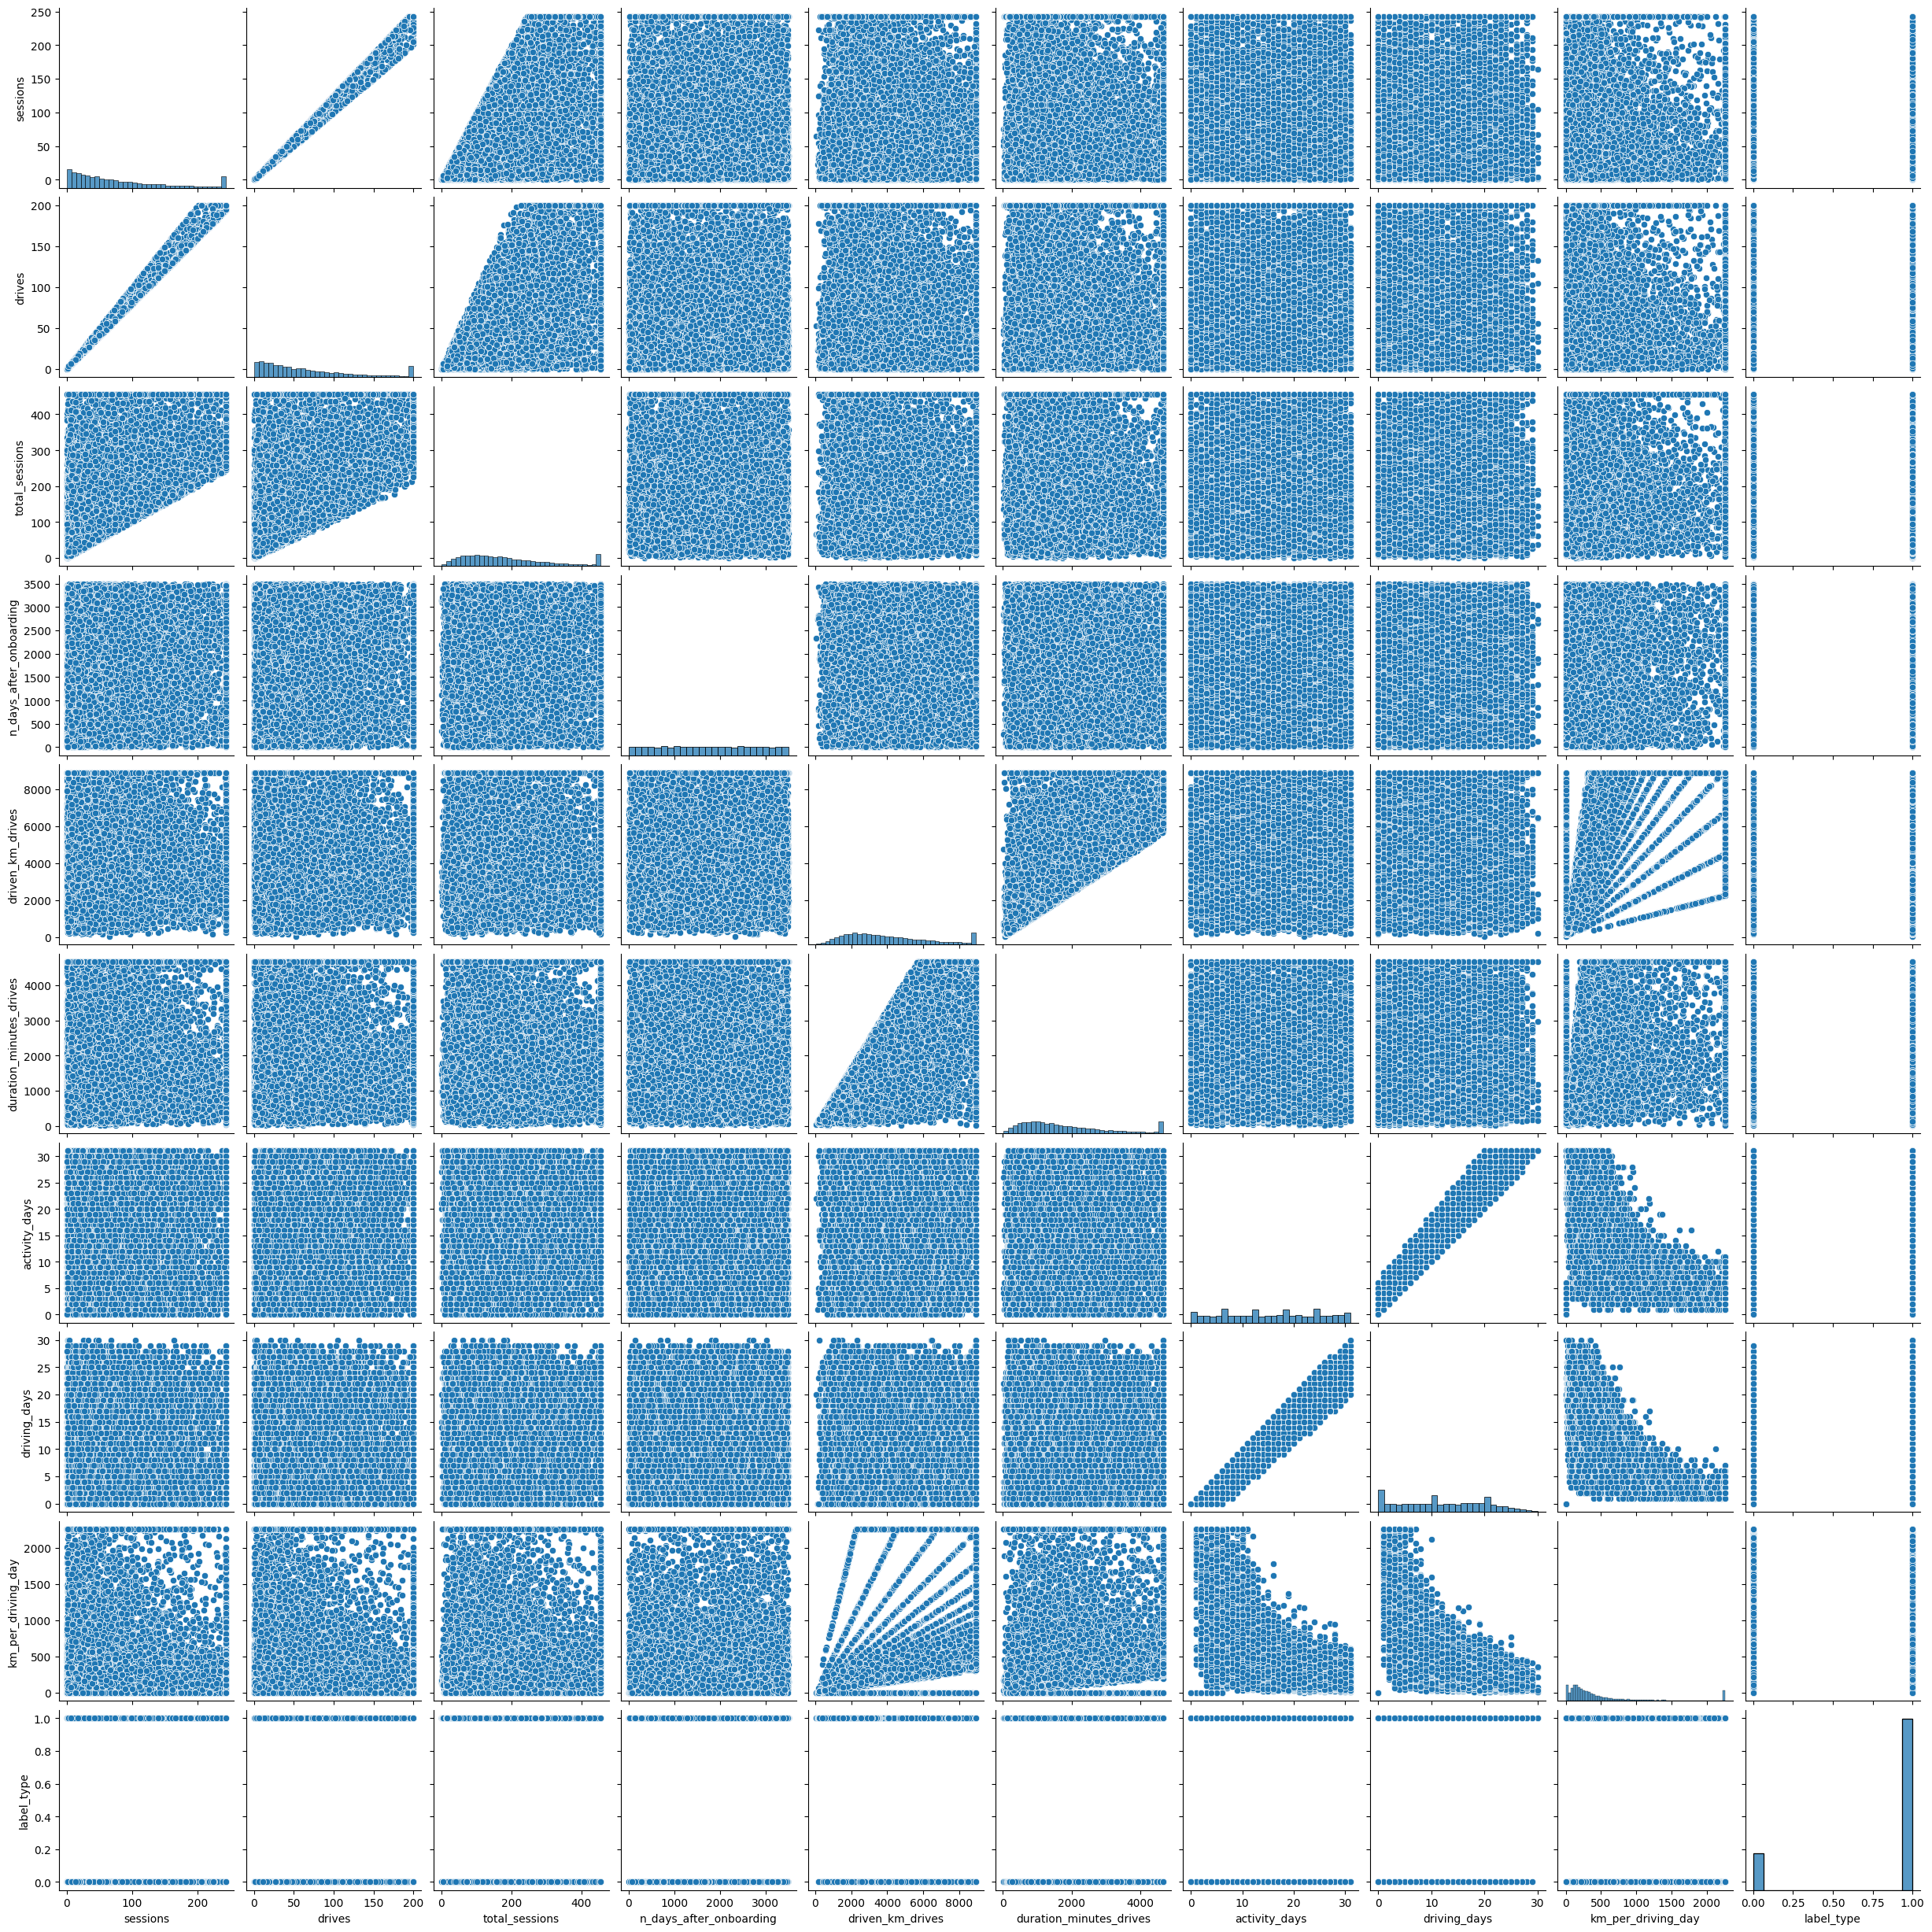

In [45]:
sns.pairplot(data=df1)

In [46]:
df[['label','label_type']].tail()

label  label_type
14994  retained           1
14995  retained           1
14996  retained           1
14997   churned           0
14998  retained           1

In [51]:
df[['device','device_type']].tail()

device  device_type
14994   iPhone            1
14995  Android            0
14996   iPhone            1
14997   iPhone            1
14998   iPhone            1

#### **Logistic Regression Model**

>**Checking Model Assumptions**

The following are the assumptions for logistic regression:

* Independent observations (This refers to how the data was collected.)

* No extreme outliers

* Little to no multicollinearity among X predictors

* Linear relationship between X and the **logit** of y

For the first assumption, you can assume that observations are independent for this project.

The second assumption has already been addressed.

The last assumption will be verified after modeling.


> Checking for collinearity

In [52]:
# Generate a correlation matrix
df1.corr(method='pearson',numeric_only=True)

sessions    drives  total_sessions  \
sessions                 1.000000  0.996942        0.597189   
drives                   0.996942  1.000000        0.595285   
total_sessions           0.597189  0.595285        1.000000   
n_days_after_onboarding  0.007101  0.006940        0.006596   
driven_km_drives         0.002996  0.003445        0.001016   
duration_minutes_drives -0.004545 -0.003889       -0.000338   
activity_days            0.025113  0.024357        0.015755   
driving_days             0.020294  0.019608        0.012953   
km_per_driving_day      -0.007664 -0.007190       -0.008282   
label_type              -0.034911 -0.035865       -0.024568   
device_type              0.012704  0.011684        0.012138   

                         n_days_after_onboarding  driven_km_drives  \
sessions                                0.007101          0.002996   
drives                                  0.006940          0.003445   
total_sessions                          0.006596          0.001016   
n_days_after_onboarding                 1.000000         -0.004652   
driven_km_drives                       -0.004652          1.000000   
duration_minutes_drives                -0.010167          0.690515   
activity_days                          -0.009418         -0.007441   
driving_days                           -0.007321         -0.009549   
km_per_driving_day                      0.010837          0.409997   
label_type                              0.129263         -0.019767   
device_type                            -0.011299         -0.002091   

                         duration_minutes_drives  activity_days  driving_days  \
sessions                               -0.004545       0.025113      0.020294   
drives                                 -0.003889       0.024357      0.019608   
total_sessions                         -0.000338       0.015755      0.012953   
n_days_after_onboarding                -0.010167      -0.009418     -0.007321   
driven_km_drives                        0.690515      -0.007441     -0.009549   
duration_minutes_drives                 1.000000      -0.007895     -0.009425   
activity_days                          -0.007895       1.000000      0.947687   
driving_days                           -0.009425       0.947687      1.000000   
km_per_driving_day                      0.287070      -0.489336     -0.503812   
label_type                             -0.040407       0.303851      0.294259   
device_type                            -0.007709      -0.010221     -0.003859   

                         km_per_driving_day  label_type  device_type  
sessions                          -0.007664   -0.034911     0.012704  
drives                            -0.007190   -0.035865     0.011684  
total_sessions                    -0.008282   -0.024568     0.012138  
n_days_after_onboarding            0.010837    0.129263    -0.011299  
driven_km_drives                   0.409997   -0.019767    -0.002091  
duration_minutes_drives            0.287070   -0.040407    -0.007709  
activity_days                     -0.489336    0.303851    -0.010221  
driving_days                      -0.503812    0.294259    -0.003859  
km_per_driving_day                 1.000000   -0.176887     0.000954  
label_type                        -0.176887    1.000000    -0.003406  
device_type                        0.000954   -0.003406     1.000000

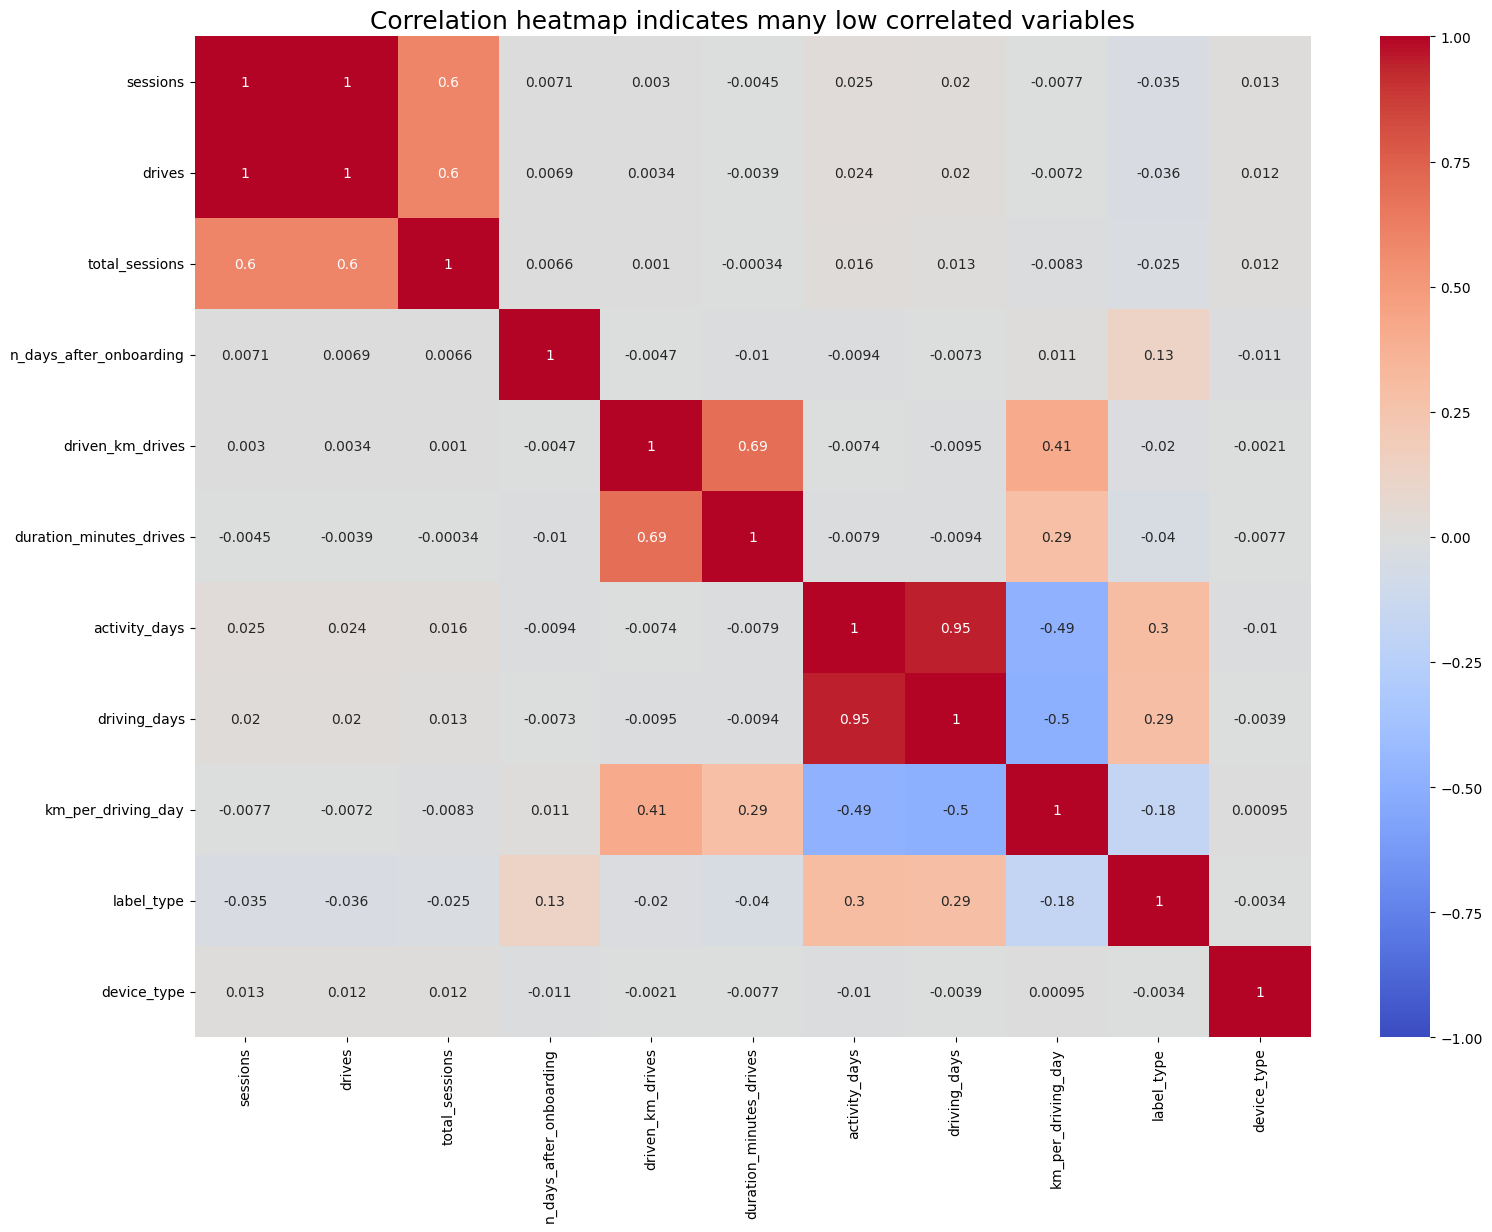

In [53]:
#Plotting a correlation heatmap viz

plt.figure(figsize=(18,13))
sns.heatmap(df1.corr(method='pearson', numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show()

**Variables that  are multicollinear with each other:**

>Using 0.7 as absolute threshold

> * *`sessions` and `drives`: 1.0*
<br>
> * *`driving_days` and `activity_days`: 0.95*

In [ ]:
#Selecting my feature predictors
X = df1.drop(columns = ['label', 'label_type', 'sessions', 'driving_days'])

In [ ]:
#selecting my outcome target
y= df1[['label_type']]

In [57]:
#Creating Hold-out sample to train and test the model.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify= y)

In [58]:
X_train.head()

drives  total_sessions  n_days_after_onboarding  driven_km_drives  \
10833     162      256.867274                     2022       2947.870484   
1389       20       96.765176                     1084        922.407250   
14113      91      455.439492                     2944       1633.166966   
7259        8       24.389810                     1494       1192.981495   
5182       33       62.095670                     1799       8898.716275   

       duration_minutes_drives  activity_days  km_per_driving_day  device_type  
10833              1617.439212             17          226.759268            0  
1389                761.448414             21           51.244847            1  
14113              1336.769469             27           81.658348            1  
7259                919.142447              0            0.000000            1  
5182               4668.180092             24          590.967966            0

In [60]:
clf = LogisticRegression(penalty=None, max_iter= 400).fit(X_train, y_train)
clf.coef_

c:\Users\USER\Documents\Data Science Repositories\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-2.17922840e-03, -1.84930849e-04,  3.77229243e-04,
         3.08762582e-05, -1.50484419e-04,  1.00655831e-01,
        -4.95379417e-05, -2.78521788e-03]])

In [62]:
pd.Series(clf.coef_[0], index=X.columns)

drives                    -0.002179
total_sessions            -0.000185
n_days_after_onboarding    0.000377
driven_km_drives           0.000031
duration_minutes_drives   -0.000150
activity_days              0.100656
km_per_driving_day        -0.000050
device_type               -0.002785
dtype: float64

In [63]:
clf.intercept_

array([-0.04239699])

#### **Verifying final assumption**

Verifying the linear relationship between X and the estimated log odds (known as logits) by making a regplot.

In [69]:
# Retrieving the predicted probabilities of the training data
training_probabilities = clf.predict_proba(X_train)
training_probabilities

array([[0.13384765, 0.86615235],
       [0.08888035, 0.91111965],
       [0.03403391, 0.96596609],
       ...,
       [0.31067282, 0.68932718],
       [0.04707035, 0.95292965],
       [0.29879072, 0.70120928]])

This results in a 2-D array where each row represents a user in `X_train`. The first column is the probability of the user not churning, and the second column is the probability of the user churning.

In [70]:
logit_data = X_train.copy()

In [71]:
#Creating a new `logit` column in the `logit_data` 
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

In [72]:
logit_data.head()

drives  total_sessions  n_days_after_onboarding  driven_km_drives  \
10833     162      256.867274                     2022       2947.870484   
1389       20       96.765176                     1084        922.407250   
14113      91      455.439492                     2944       1633.166966   
7259        8       24.389810                     1494       1192.981495   
5182       33       62.095670                     1799       8898.716275   

       duration_minutes_drives  activity_days  km_per_driving_day  \
10833              1617.439212             17          226.759268   
1389                761.448414             21           51.244847   
14113              1336.769469             27           81.658348   
7259                919.142447              0            0.000000   
5182               4668.180092             24          590.967966   

       device_type     logit  
10833            0  1.867359  
1389             1  2.327383  
14113            1  3.345771  
7259             1  0.394972  
5182             0  2.511576

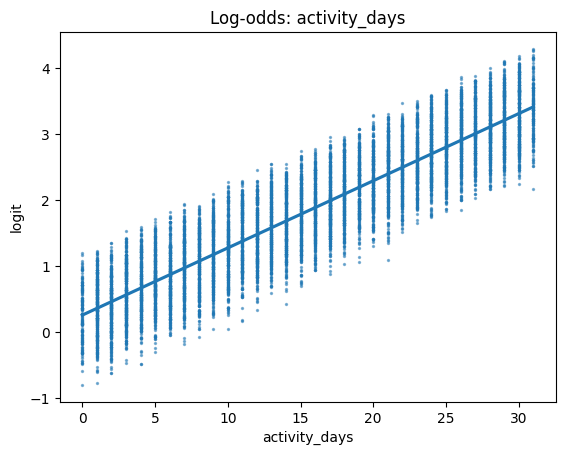

In [73]:
# Plotting regplot of `activity_days` log-odds
sns.regplot(x='activity_days', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: activity_days');

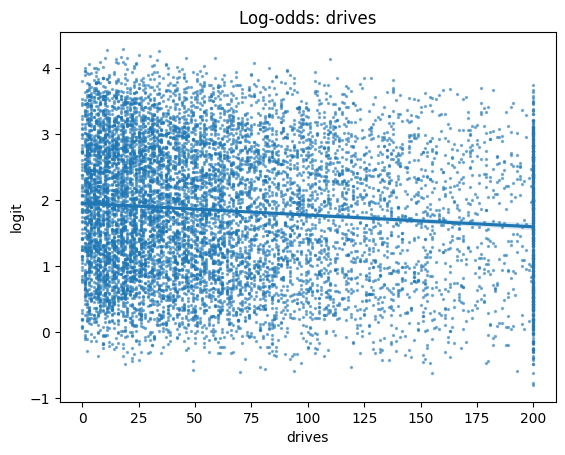

In [83]:
# Plotting regplot of `drives` log-odds
sns.regplot(x='drives', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: drives');

## **`Execute Phase`**

### **Results and evaluation**

If the logistic assumptions are met, the model results can be appropriately interpreted.

Use the code block below to make predictions on the test data.


In [84]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
clf.score(y_test, X_test)

In [93]:
y_test.value_counts()

label_type
1             3529
0              761
Name: count, dtype: int64

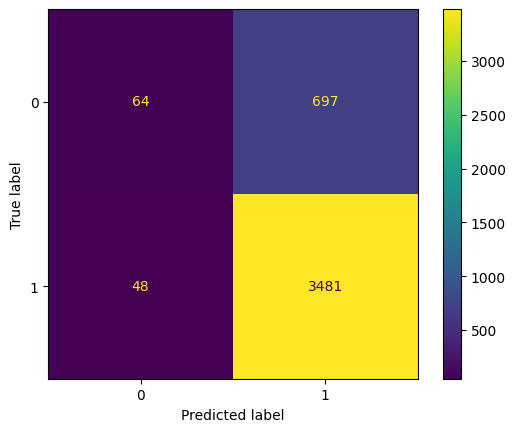

In [89]:
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

`Term`	                `Description`	                                                `Value`

True Negatives (TN)	    Model correctly predicted churn (0)	                            64

False Positives (FP)	Model predicted retained (1), but user churned (0)	            697

False Negatives (FN)	Model predicted churn (0), but user was actually retained (1)	48

True Positives (TP)	    Model correctly predicted retained (1)	                        3481


>**Key Observations**

> The model is very good at identifying retained users (class 1).

> It performs very poorly at identifying churned users (class 0) — only 64 out of 761 actual churners were correctly identified.

> High false positives: 697 users were predicted to stay but actually churned.

In [88]:
# Create classification report for logistic regression model
# Create a classification report
target_labels = ['churned','retained']
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

     churned       0.57      0.08      0.15       761
    retained       0.83      0.99      0.90      3529

    accuracy                           0.83      4290
   macro avg       0.70      0.54      0.52      4290
weighted avg       0.79      0.83      0.77      4290



> **Note:** The model has mediocre precision and very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn.

In [95]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, clf.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('activity_days', np.float64(0.10065583077008206)),
 ('n_days_after_onboarding', np.float64(0.0003772292429978638)),
 ('driven_km_drives', np.float64(3.0876258221096565e-05)),
 ('km_per_driving_day', np.float64(-4.953794173746618e-05)),
 ('duration_minutes_drives', np.float64(-0.00015048441909973676)),
 ('total_sessions', np.float64(-0.00018493084870715336)),
 ('drives', np.float64(-0.002179228402539321)),
 ('device_type', np.float64(-0.002785217882475476))]

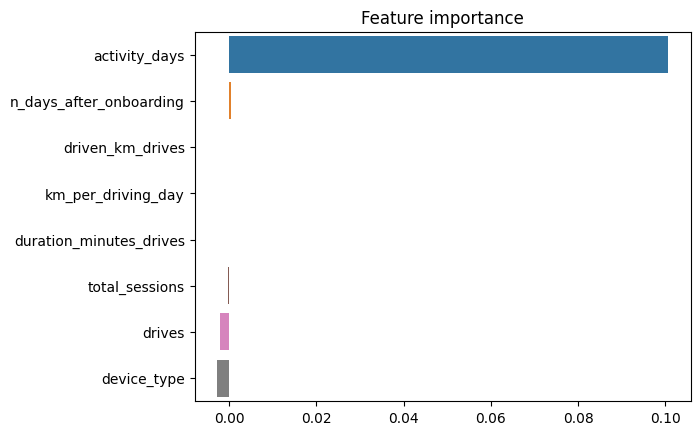

In [98]:
# Plotting the feature importances

sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h', hue=[x[0] for x in feature_importance])
plt.title('Feature importance');

### **Conclusion**



### Overview

Our data science team has developed and evaluated a machine learning model to predict user churn for the Waze platform. This executive summary presents our key findings, model performance metrics, and strategic recommendations for leadership consideration.

### Model Performance Summary

The logistic regression model achieved an **83% overall accuracy** in predicting user churn behavior. However, a deeper analysis of the performance metrics reveals important nuances:

#### Key Performance Metrics
- **Overall Accuracy**: 83%
- **Precision for Churn Detection**: 57%
- **Recall for Churn Detection**: 8%
- **F1-Score for Churn Detection**: 0.15

#### Model Predictions Breakdown
- **True Negatives**: 3,481 users correctly predicted as retained
- **True Positives**: 64 users correctly predicted as churned
- **False Positives**: 697 users incorrectly predicted as retained (but actually churned)
- **False Negatives**: 48 users incorrectly predicted as churned (but actually retained)

## Critical Findings

### 1. Primary Predictive Factor
**Activity Days** emerged as the most influential predictor of user churn, showing a strong negative correlation with churn behavior. This finding aligns with our exploratory data analysis, where we observed that users with higher activity levels demonstrate significantly lower churn rates.

### 2. Unexpected Model Behavior
Contrary to our initial exploratory analysis, **kilometers per driving day** proved to be a weaker predictor than anticipated. While our preliminary analysis showed this variable had the strongest positive correlation with churn, the multivariate model ranked it as the second-least important factor. This discrepancy highlights the complex interactions between variables in predictive modeling.

### 3. Model Limitations
The model demonstrates a significant weakness in **recall performance (8%)**, meaning it fails to identify 92% of users who actually churn. This represents a critical limitation for practical business applications.

## Strategic Implications

### Business Impact Assessment
While the model shows promise with 83% overall accuracy, the extremely low recall rate for churn detection presents substantial challenges for business implementation. The model's inability to effectively identify at-risk users limits its utility for proactive retention strategies.

### Variable Interactions
The multivariate nature of our model reveals complex feature interactions that, while improving predictive accuracy, make the model less interpretable. This trade-off between predictive power and explainability is a common challenge in machine learning applications.

## Recommendations

### Immediate Actions
1. **Limited Deployment**: The current model should **not** be used for high-stakes business decisions or automated retention campaigns due to its poor recall performance.

2. **Exploratory Use**: The model can serve as a valuable tool for guiding further research and hypothesis generation about user behavior patterns.

### Future Development Priorities
1. **Model Enhancement**: Invest in advanced modeling techniques to improve recall performance, potentially including:
   - Ensemble methods
   - Feature engineering
   - Alternative algorithms (Random Forest, Gradient Boosting)


2. **Data Collection**: Expand data collection efforts to capture additional user behavior indicators that may improve predictive accuracy.

3. **Threshold Optimization**: Investigate alternative classification thresholds to balance precision and recall based on business objectives.

## Conclusion

Our initial churn prediction model provides valuable insights into user behavior patterns, particularly highlighting the critical importance of user activity levels. However, the model's current limitations prevent immediate deployment for business-critical applications. We recommend treating this as a foundational step in developing a more robust churn prediction system.

The next phase should focus on model improvement techniques and expanded data collection to enhance our ability to identify at-risk users effectively. With continued development, this approach has the potential to significantly impact user retention strategies and business outcomes.
